In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps


## Open files

In [2]:
df=pd.read_csv('U_superdarn_mean_winds.csv')
df_w=pd.read_csv('U_waccmxdart_mean_winds.csv')

## Read-in Superdarn data

In [3]:
df = df.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df = df.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df)

Ending dataframe:
                    Date    Kod    Pgr   Sas    Rkn    Pyk    Han
0    2009-01-12 00:00:00  16.18  11.30  2.00  11.34  10.67  24.66
1    2009-01-12 01:00:00  16.46  11.26  1.86  10.79  10.70  24.27
2    2009-01-12 02:00:00  16.76  11.19  1.64   9.92  10.81  23.95
3    2009-01-12 03:00:00  16.80  11.09  1.49  11.15  11.06  23.92
4    2009-01-12 04:00:00  17.06  10.88  1.76  11.64  11.27  24.20
...                  ...    ...    ...   ...    ...    ...    ...
1555 2009-03-17 19:00:00  -0.19    NaN -0.03   2.68   7.17   6.18
1556 2009-03-17 20:00:00   0.09    NaN  0.09   2.19   7.12   6.20
1557 2009-03-17 21:00:00   0.26    NaN  0.01   2.53   6.81   6.03
1558 2009-03-17 22:00:00   0.52    NaN  0.12   2.28   6.57   5.81
1559 2009-03-17 23:00:00   0.76    NaN  0.41   2.28   6.44   5.68

[1560 rows x 7 columns]


## Read-in WACCMXDART data

In [6]:
df_w = df_w.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df_w.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df_w[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df_w.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df_w = df_w.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df_w)

Ending dataframe:
                    Date    Kod    Pgr   Sas    Rkn   Pyk    Han
0    2009-01-12 00:00:00  19.24  17.64  5.04 -14.52  9.03  13.59
1    2009-01-12 01:00:00  19.40  17.68  4.98 -14.68  8.99  13.81
2    2009-01-12 02:00:00  19.55  17.65  4.84 -14.29  8.91  14.06
3    2009-01-12 03:00:00  19.53  17.53  4.70 -14.41  8.75  14.36
4    2009-01-12 04:00:00  19.63  17.30  4.79 -14.49  8.57  14.62
...                  ...    ...    ...   ...    ...   ...    ...
1555 2009-03-17 19:00:00 -31.83    NaN -0.10 -17.62 -0.32  -6.14
1556 2009-03-17 20:00:00 -31.85    NaN  0.46 -17.25 -0.37  -6.19
1557 2009-03-17 21:00:00 -32.07    NaN  1.04 -16.67 -0.52  -6.31
1558 2009-03-17 22:00:00 -32.31    NaN  1.60 -16.19 -0.64  -6.31
1559 2009-03-17 23:00:00 -32.31    NaN  2.06 -16.19 -0.70  -6.31

[1560 rows x 7 columns]


## Set Date as index for both datasets

In [7]:
df=df.set_index('Date')
df_w=df_w.set_index('Date')

## Making graphs for the 6 radar stations

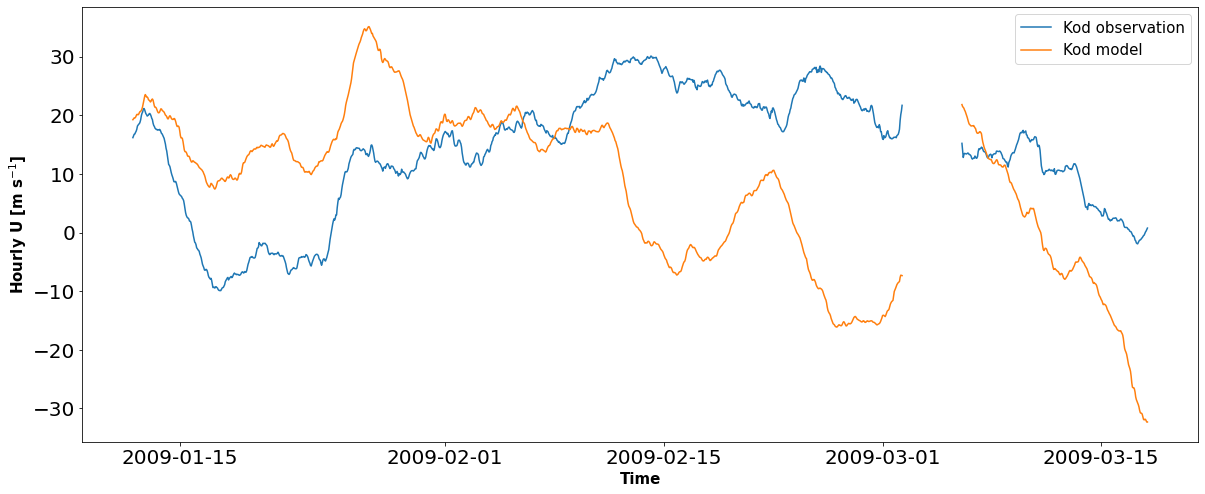

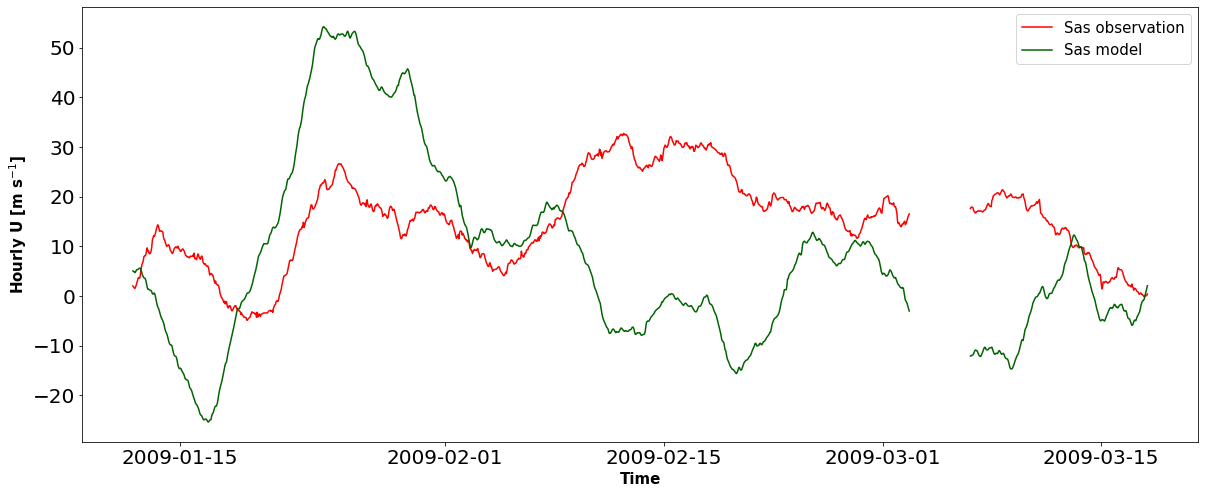

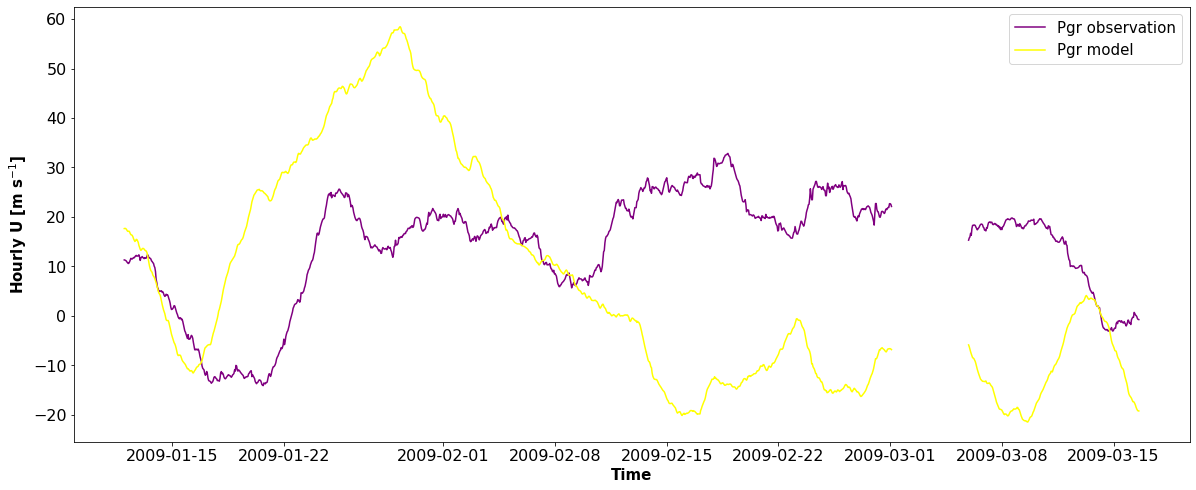

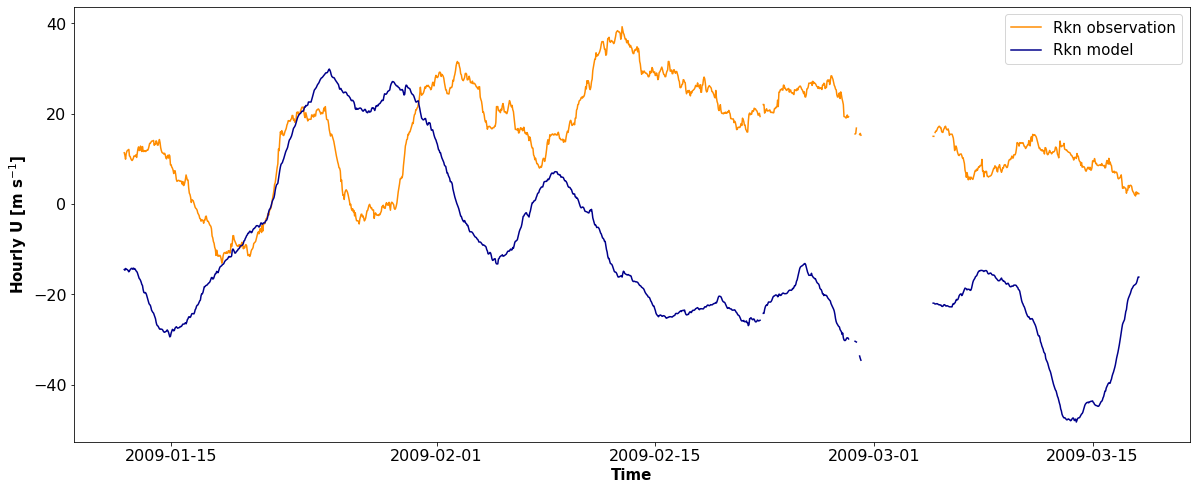

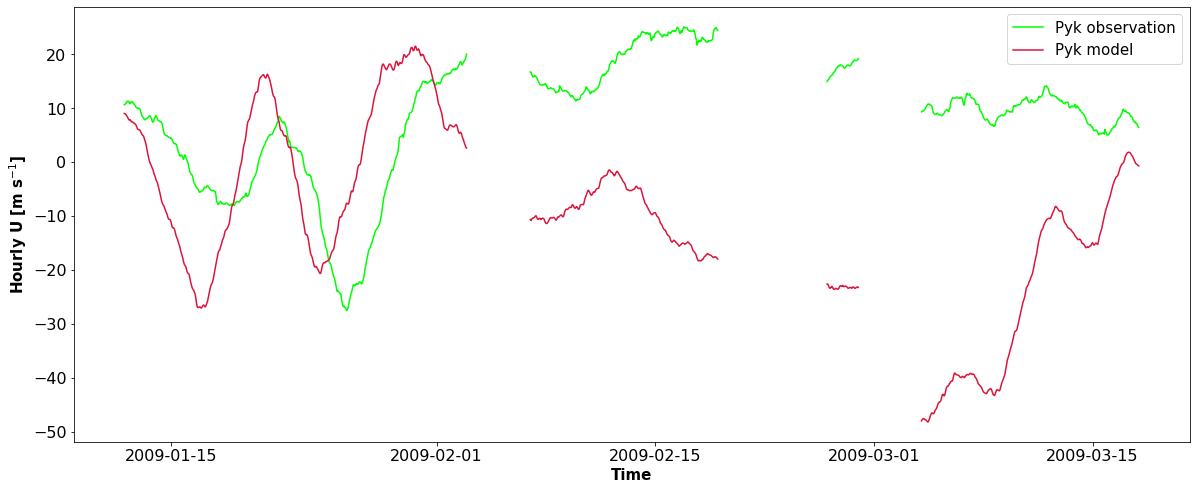

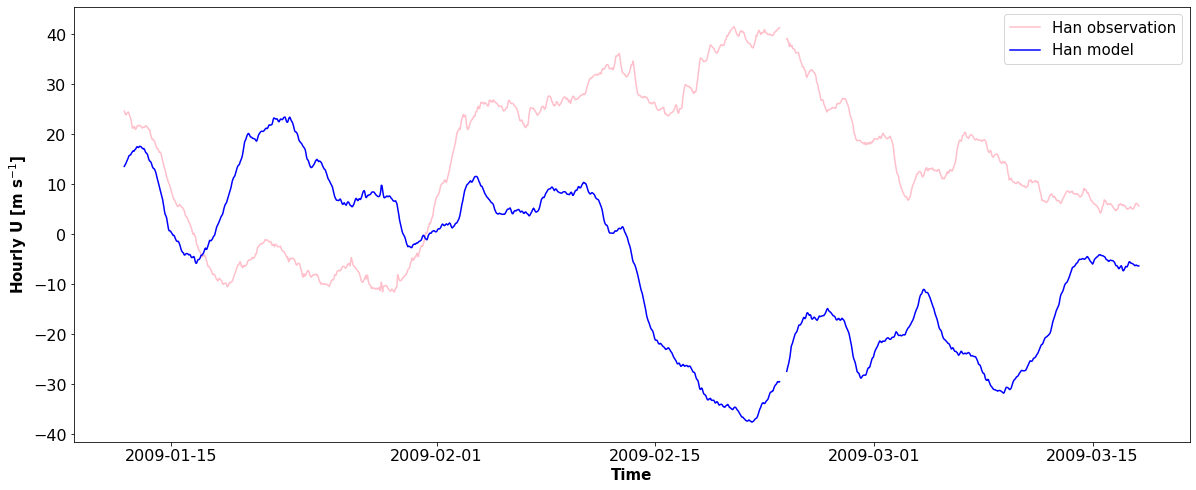

In [17]:
#Kod radar station 
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Kod'], label='Kod observation')
plt.plot(df_w.index,df_w['Kod'], label= 'Kod model')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Sas radar station 
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Sas'], label='Sas observation', color='r')
plt.plot(df_w.index,df_w['Sas'], label= 'Sas model', color='darkgreen')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Pgr radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Pgr'], label='Pgr observation', color = 'purple')
plt.plot(df_w.index,df_w['Pgr'], label= 'Pgr model', color = 'yellow')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Rkn radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Rkn'], label='Rkn observation', color = 'darkorange')
plt.plot(df_w.index,df_w['Rkn'], label= 'Rkn model', color = 'darkblue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Pyk radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Pyk'], label='Pyk observation', color = 'lime')
plt.plot(df_w.index,df_w['Pyk'], label= 'Pyk model', color = 'crimson')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)

#Han radar station
plt.figure(figsize=(20,8))
plt.plot(df.index,df['Han'], label='Han observation', color = 'pink')
plt.plot(df_w.index,df_w['Han'], label= 'Han model', color = 'blue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)